# Integrated Assessment
Modules: Machine Learning for Business 

Student: Danton Prestes - sbs23086

# Question 2

In [1]:
import pandas as pd
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv("Data_text_23.csv")

In [3]:
#Here we can see the number of lines and rows (columns) from the dataset.
df.shape

(23006, 41)

In [4]:
df.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,...,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
0,1,1,Assam,S1438213588544409600,0,1,1,0,3,S1438213588544409600,...,0.0,0.0,0.0,3.23,0.0,0.00,0.0,1,-2,1
1,2,2,Assam,S1438437895270846464,0,1,1,0,3,S1438437895270846464,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-1,0
2,3,3,Assam,S1439558164936941574,0,1,1,0,3,S1439558164936941574,...,0.0,0.0,0.0,0.00,0.0,0.00,0.0,1,-2,1
3,4,4,Assam,S1439920409801945089,0,1,3,0,5,S1439920409801945089,...,0.0,0.0,0.0,0.00,0.0,2.08,0.0,1,-1,0
4,5,5,Assam,S1440221445011898371,0,1,1,0,3,S1440221445011898371,...,0.0,0.0,0.0,5.71,0.0,0.00,0.0,1,-1,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23006 entries, 0 to 23005
Data columns (total 41 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              23006 non-null  int64  
 1   X                23006 non-null  int64  
 2   State            23006 non-null  object 
 3   conversation_id  23006 non-null  object 
 4   retweet_count    23006 non-null  int64  
 5   reply_count      23006 non-null  int64  
 6   like_count       23006 non-null  int64  
 7   quote_count      23006 non-null  int64  
 8   Buzz             23006 non-null  int64  
 9   id               23006 non-null  object 
 10  Date1            23006 non-null  object 
 11  OpnHours         23006 non-null  object 
 12  DateDay          23006 non-null  object 
 13  Day              23006 non-null  object 
 14  Time             23006 non-null  object 
 15  3-Phase          23006 non-null  object 
 16  4-phase          23006 non-null  object 
 17  Followers   

In [6]:
df.rename(columns={'Status_text': 'text'}, inplace=True)


In [7]:
pd.set_option('display.max_columns', None)
df.describe()

,Sno,X,retweet_count,reply_count,like_count,quote_count,Buzz,Followers,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
count,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,2.300600e+04,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000,23006.000000
mean,11503.500000,828.641833,18.857168,3.595062,139.501304,1.468660,203.262931,5.082265e+05,38.723420,63.853962,4.705857,7.366719,4.433875,1.091667,3.258420,0.632105,0.652306,3.192485,0.053130,0.632105,0.193785,1.431833,0.483109,0.519711,0.219480,1.269799,-1.056377,0.326176
std,6641.404482,776.896316,61.300045,32.241142,537.268359,17.794031,730.136030,5.960315e+05,12.588226,25.410441,4.318090,4.128888,2.664032,2.008155,1.660668,1.651663,1.600454,3.710467,0.518322,1.651663,0.806686,2.318887,1.273838,1.349585,0.828681,0.656546,0.283570,0.770302
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.164000e+03,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-5.000000,0.000000
25%,5752.250000,260.000000,4.000000,0.000000,27.000000,0.000000,42.000000,9.132500e+04,31.000000,40.060000,1.850000,4.440000,2.440000,0.000000,2.170000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
50%,11503.500000,592.000000,9.000000,1.000000,63.000000,1.000000,96.000000,1.901970e+05,40.000000,65.160000,4.000000,6.670000,4.000000,0.000000,2.700000,0.000000,0.000000,2.330000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
75%,17254.750000,1135.000000,21.000000,3.000000,137.000000,1.000000,208.000000,6.507710e+05,46.000000,88.150000,6.980000,9.520000,5.560000,2.130000,4.000000,0.000000,0.000000,4.880000,0.000000,0.000000,0.000000,2.380000,0.000000,0.000000,0.000000,1.000000,-1.000000,0.000000
max,23006.000000,3685.000000,3519.000000,4580.000000,38244.000000,2546.000000,48864.000000,1.972674e+06,205.000000,99.000000,50.000000,37.500000,30.000000,23.530000,20.000000,30.000000,50.000000,40.000000,15.380000,30.000000,12.730000,33.330000,33.330000,33.330000,14.290000,5.000000,-1.000000,6.000000


In [8]:
# Checking some samples to understand how dataset looks like and if any obvious missing values or 
# any details that needs handling of data. 
df.sample(10)

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,Date1,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
22391,22392,2046,Uttarkhand,S1465626028764631043,12,2,68,0,108,S1465626028764631043,30-11-2021,Working Hours,Tuesday,weekday,Business hours,Post Lockdown,Post Lockdown,91325,Badrinath is among the four dominant Char Dham...,video,Interaction,53,51.31,0.00,3.77,1.89,0.00,1.89,0.0,0.00,5.66,1.89,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
7794,7795,404,Maharashtra,S1281098714983960582,6,0,47,0,65,S1281098714983960582,09-07-2020,Non-working Hours,Thursday,weekday,Non-buisness hours,Covid Lockdown,Unlocking,331116,Maharashtra: Tadoba Tiger Reserve's buffer zon...,text,Information,21,40.06,0.00,4.76,4.76,0.00,4.76,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
10535,10536,1082,MP,S1405482421361922051,6,1,62,1,82,S1405482421361922051,17-06-2021,Working Hours,Thursday,weekday,Business hours,Post Lockdown,Post Lockdown,625186,#MadhyaPradesh is taking a step ahead as Welln...,photo,Information,50,51.99,2.00,4.00,4.00,0.00,4.00,0.0,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
22825,22826,297,WestBengal,S1341609462751084547,6,0,39,1,57,S1341609462751084547,23-12-2020,Non-working Hours,Wednesday,weekday,Non-buisness hours,Covid Lockdown,Unlocking,328751,The 10th edition of #KolkataChristmasFestival ...,photo,Interaction,45,40.06,2.22,6.67,4.44,0.00,4.44,0.0,0.00,4.44,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
19236,19237,334,UP,S1215518012972814337,33,0,164,2,263,S1215518012972814337,10-01-2020,Non-working Hours,Friday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,517867,"Listen to @thealkayagnik, one of the renowned ...",video,Information,44,86.82,2.27,9.09,2.27,0.00,2.27,0.0,0.00,2.27,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
9753,9754,300,MP,S1188696944329125888,25,3,200,3,281,S1188696944329125888,28-10-2019,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,625186,Make up your mind to spend some good moments a...,video,Information,47,65.16,8.51,14.89,6.38,4.26,2.13,0.0,2.13,4.26,0.00,0.0,0.0,2.13,2.13,0.0,0.0,1,-1,0
11516,11517,516,Odisha,S1347491586012188676,5,3,28,1,49,S1347491586012188676,08-01-2021,Working Hours,Friday,weekday,Business hours,Covid Lockdown,Unlocking,1213817,"Champion wildlife conservationist, @deomurari ...",video,Information,44,53.63,0.00,9.09,4.55,0.00,4.55,0.0,0.00,2.27,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
18186,18187,557,Telangana,S1423996553077792776,1,0,4,0,7,S1423996553077792776,07-08-2021,Working Hours,Saturday,weekend,Non-buisness hours,Post Lockdown,Post Lockdown,10674,"Hon’ble Chairman of TSTDC, Mr Uppala Srinivas ...",video,Information,37,71.32,0.00,8.11,2.70,0.00,2.70,0.0,0.00,5.41,0.00,0.0,0.0,0.00,0.00,0.0,0.0,1,-1,0
8740,8741,53,Mizoram,S1220823661617111040,0,0,13,0,13,S1220823661617111040,24-01-2020,Non-working Hours,Friday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,15324,International Paragliding Championship 2020 - ...,video,Information,37,83.39,8.11,5.41,2.70,0.00,2.70,0.0,5.41,2.70,0.00,0.0,0.0,0.00,0.00,2.7,0.0,1,-1,0
20510,20511,165,Uttarkhand,S1129690940107444224,6,14,64,0,110,S1129690940107444224,18-05-2019,Working Hours,Saturday,weekend,Non-buisness hours,Pre-Covid,Pre-Covid,91325,One of the pilgrim center in Uttarakhand and a...,photo,Interaction,33,74.59,6.06,3.03,3.03,0.00,3.03,0.0,3.03,0.00,0.00,0.0,0.0,6.06,0.00,0.0,0.0,1,-1,0


In [9]:
#checking for missing values
df.isna().sum()

Sno                0
X                  0
State              0
conversation_id    0
retweet_count      0
reply_count        0
like_count         0
quote_count        0
Buzz               0
id                 0
Date1              0
OpnHours           0
DateDay            0
Day                0
Time               0
3-Phase            0
4-phase            0
Followers          0
Status text        0
Vividness          0
ContentType        0
WC                 0
Clout              0
Cognition          0
Affect             0
emotion            0
emo_pos            0
emo_neg            0
we                 0
tentat             0
Drives             0
i                  0
we.1               0
they               0
insight            0
cause              0
discrep            0
certitude          0
Positive           0
Negative           0
Total_Sentiment    0
dtype: int64

In [10]:
# Convert the 'Date' column to datetime
df['Date1'] = pd.to_datetime(df['Date1'])

# Sort the DataFrame based on the 'Date' column
df_sorted = df.sort_values(by='Date1')

df = df.sort_values(by='Date1').reset_index(drop=True)

In [11]:
df.set_index("Date1", inplace=True)
df.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
Date1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-25,9455,1,MP,S1110030613996806144,9,0,33,1,60,S1110030613996806144,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,625186,"Throwing of vibrant colours, splashing of colo...",photo,Interaction,47,52.76,2.13,10.64,8.51,6.38,2.13,0.0,0.00,2.13,0.00,0.0,0.00,2.13,0.0,0.0,0.0,1,-1,0
2019-03-25,13317,2,Rajasthan,S1110162253066760192,5,6,30,0,57,S1110162253066760192,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,190197,Rejuvenating Chaach from Rajasthan or Refreshi...,Poll,Interaction,20,89.50,10.00,15.00,0.00,0.00,0.00,0.0,5.00,5.00,0.00,0.0,0.00,5.00,0.0,0.0,0.0,1,-1,0
2019-03-25,13316,1,Rajasthan,S1110055972641406977,15,33,102,1,213,S1110055972641406977,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,190197,The world's largest cannon is placed at this f...,photo,Interaction,33,58.11,6.06,3.03,3.03,0.00,3.03,0.0,6.06,0.00,0.00,0.0,0.00,6.06,0.0,0.0,0.0,1,-1,0
2019-03-25,12356,1355,Odisha,S1110121617693171713,5,0,28,2,43,S1110121617693171713,Working Hours,Monday,weekday,Business hours,Pre-Covid,Pre-Covid,1213817,#MondayMotivation on Art Trail to Raguhrajpur....,photo,Interaction,30,98.75,6.67,6.67,6.67,0.00,6.67,0.0,0.00,0.00,0.00,0.0,3.33,3.33,0.0,0.0,0.0,1,-1,0
2019-03-25,18904,1,UP,S1110062193582768129,12,0,45,1,81,S1110062193582768129,Non-working Hours,Monday,weekday,Non-buisness hours,Pre-Covid,Pre-Covid,517867,"Kans Qila in Mathura, constructed by Raja Mans...",photo,Information,48,18.97,6.25,6.25,2.08,0.00,2.08,0.0,2.08,0.00,2.08,0.0,0.00,4.17,0.0,0.0,0.0,4,-1,3


Before resampling, understanding the dates (older and newest posts)

In [12]:
dfr = df.resample("D")

In [13]:
dfr

In [14]:
dfr = dfr.count()
dfr.head()

,Sno,X,State,conversation_id,retweet_count,reply_count,like_count,quote_count,Buzz,id,OpnHours,DateDay,Day,Time,3-Phase,4-phase,Followers,Status text,Vividness,ContentType,WC,Clout,Cognition,Affect,emotion,emo_pos,emo_neg,we,tentat,Drives,i,we.1,they,insight,cause,discrep,certitude,Positive,Negative,Total_Sentiment
Date1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-03-25,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14,14
2019-03-26,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
2019-03-27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
2019-03-28,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
2019-03-29,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27


<AxesSubplot:xlabel='Date1'>

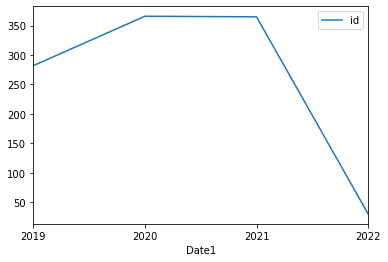

In [15]:
dfr.resample("Y").count().plot(y='id')

Conclusion here is that resampling worked as expected. we can see the posts grouped by dates (yearly).
An observation was that the values became flat after resampling. We can see the same figures across the rows for the days. 
Tried resampling with other parameters like, monthly, weekly and daily. 

<AxesSubplot:xlabel='Date1'>

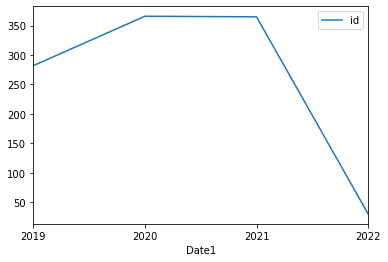

In [16]:
#Yearly

dfr.resample("Y").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

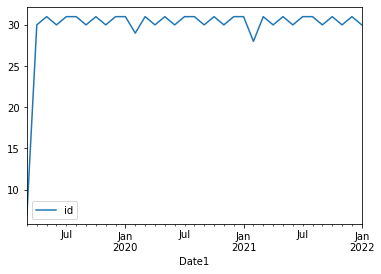

In [17]:
#Monthly

dfr.resample("M").count().plot(y='id')

<AxesSubplot:xlabel='Date1'>

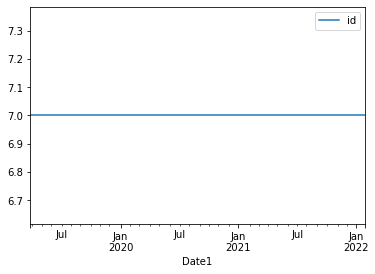

In [18]:
#Weekly

dfr.resample("W").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

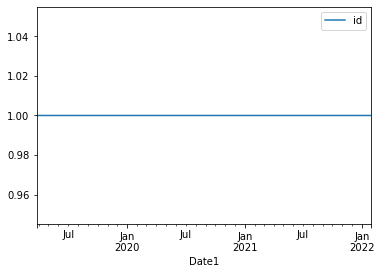

In [19]:
dfr.resample("D").count().plot(y="id")

<AxesSubplot:xlabel='Date1'>

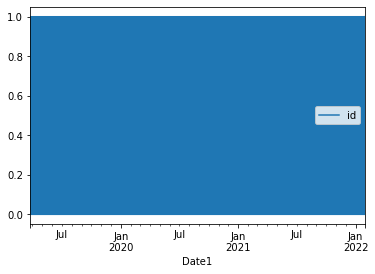

In [20]:
dfr.resample("10T").count().plot(y="id")

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23006 entries, 2019-03-25 to 2022-01-30
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              23006 non-null  int64  
 1   X                23006 non-null  int64  
 2   State            23006 non-null  object 
 3   conversation_id  23006 non-null  object 
 4   retweet_count    23006 non-null  int64  
 5   reply_count      23006 non-null  int64  
 6   like_count       23006 non-null  int64  
 7   quote_count      23006 non-null  int64  
 8   Buzz             23006 non-null  int64  
 9   id               23006 non-null  object 
 10  OpnHours         23006 non-null  object 
 11  DateDay          23006 non-null  object 
 12  Day              23006 non-null  object 
 13  Time             23006 non-null  object 
 14  3-Phase          23006 non-null  object 
 15  4-phase          23006 non-null  object 
 16  Followers        23006 non-null  int64  


# TOPIC MODELLING

In [22]:
#!pip install "pandas<2.0.0"
#!pip install nltk
#!pip install gensim
#!pip install wordcloud
#%pip install pyLDAvis
#%pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [23]:
# Importing modules
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups

# Regular Expressions - lets us prcicely manipulate strings
import re

# Let's use create a Word Cloud visualisation
from wordcloud import WordCloud

# An NLP library
import gensim
from gensim.utils import simple_preprocess
import gensim.corpora as corpora

# Natural language toolkit - another NLP library
import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords


# Print results 
from pprint import pprint

# Visulalisation library for our LDA analysis
import pyLDAvis.gensim
import pyLDAvis
pyLDAvis.enable_notebook()

# If you want to save the visualisation data
import pickle 

In [24]:
df.rename(columns={'Status text': 'text'}, inplace=True)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 23006 entries, 2019-03-25 to 2022-01-30
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Sno              23006 non-null  int64  
 1   X                23006 non-null  int64  
 2   State            23006 non-null  object 
 3   conversation_id  23006 non-null  object 
 4   retweet_count    23006 non-null  int64  
 5   reply_count      23006 non-null  int64  
 6   like_count       23006 non-null  int64  
 7   quote_count      23006 non-null  int64  
 8   Buzz             23006 non-null  int64  
 9   id               23006 non-null  object 
 10  OpnHours         23006 non-null  object 
 11  DateDay          23006 non-null  object 
 12  Day              23006 non-null  object 
 13  Time             23006 non-null  object 
 14  3-Phase          23006 non-null  object 
 15  4-phase          23006 non-null  object 
 16  Followers        23006 non-null  int64  


In [26]:
data = pd.read_csv("Data_text_23.csv")

df = pd.DataFrame({
    'text': df.text,
    'group': df.State
})

In [27]:
#ignore error for now since this is only for comparison of groups after running the model

group_name = [ df.target_text[group] for group in df['group'] ]
df['group_name'] = group_name

AttributeError: 'DataFrame' object has no attribute 'target_text'

In [28]:
df.head()

,text,group
Date1,,
2019-03-25,"Throwing of vibrant colours, splashing of colo...",MP
2019-03-25,Rejuvenating Chaach from Rajasthan or Refreshi...,Rajasthan
2019-03-25,The world's largest cannon is placed at this f...,Rajasthan
2019-03-25,#MondayMotivation on Art Trail to Raguhrajpur....,Odisha
2019-03-25,"Kans Qila in Mathura, constructed by Raja Mans...",UP


In [29]:
# Join all the text into one long string for the word cloud
long_string = ','.join(df.text)
len(long_string)

5877732

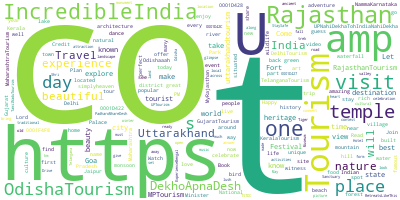

In [30]:
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue', collocations=False)
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [31]:
# Get our stop words, like 'and' and 'on'
stop_words = stopwords.words('english')

In [32]:
# Helper function to turn our sentences into a list of words
# Yeild means that it returns a generator function ie it won't run all at once, but only as needed
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

In [33]:
# Helper function to remove stopwords
def remove_stopwords(texts, stopwords=stopwords):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

In [34]:
# Getting our texts in a list to process
texts = df['text'].values.tolist()

In [35]:
words = list(sent_to_words(texts))

In [36]:
words = remove_stopwords(words) 

In [37]:
len(words)

23006

In [38]:
words[0]

['throwing',
 'vibrant',
 'colours',
 'splashing',
 'coloured',
 'water',
 'people',
 'dancing',
 'desi',
 'beats',
 'rang',
 'panchami',
 'rajwada',
 'indore',
 'known',
 'cheerful',
 'event',
 'witnesses',
 'huge',
 'lively',
 'crowd',
 'gathers',
 'celebrate',
 'auspicious',
 'festival',
 'mptourism',
 'https',
 'co',
 'en']

In [39]:
# Make a dictionary of ids for the words
id2word = corpora.Dictionary(words)

In [40]:
id2word

In [41]:
# Translates our words into their correspoinding ids
corpus = [id2word.doc2bow(text) for text in words]

In [42]:
corpus

[[(0, 1),
  (1, 1),
  (2, 1),
  (3, 1),
  (4, 1),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 1),
  (14, 1),
  (15, 1),
  (16, 1),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 1),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 1),
  (27, 1),
  (28, 1)],
 [(29, 1),
  (30, 1),
  (31, 1),
  (32, 1),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1)],
 [(4, 1),
  (14, 1),
  (32, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1)],
 [(4, 2),
  (14, 2),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 1)],
 [(4, 1),
  (14, 1),
  (17, 1),
  (43, 2),
  (65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 2

In [43]:
# Based on 'expert knowledge'
num_topics = 20

In [44]:
# Making our LDA model object
lda_model = gensim.models.LdaMulticore(
        corpus=corpus,
        id2word=id2word,
        num_topics=num_topics
)

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A Nu

In [45]:
pprint(lda_model.print_topics())

[(0,
  '0.040*"co" + 0.040*"https" + 0.008*"incredibleindia" + 0.008*"rajasthan" + '
  '0.007*"one" + 0.005*"day" + 0.004*"dekhoapnadesh" + 0.004*"amp" + '
  '0.004*"india" + 0.004*"beautiful"'),
 (1,
  '0.045*"https" + 0.044*"co" + 0.008*"rajasthan" + 0.007*"tourism" + '
  '0.006*"experience" + 0.005*"uttarakhand" + 0.005*"day" + 0.004*"amp" + '
  '0.004*"incredibleindia" + 0.004*"nature"'),
 (2,
  '0.030*"co" + 0.029*"https" + 0.006*"visit" + 0.004*"us" + 0.004*"one" + '
  '0.004*"amp" + 0.003*"nature" + 0.003*"come" + 0.003*"place" + '
  '0.003*"rajasthan"'),
 (3,
  '0.031*"co" + 0.029*"https" + 0.004*"park" + 0.004*"world" + 0.004*"tourism" '
  '+ 0.003*"come" + 0.003*"us" + 0.003*"amp" + 0.003*"one" + '
  '0.003*"uttarakhand"'),
 (4,
  '0.033*"co" + 0.033*"https" + 0.009*"amp" + 0.006*"tourism" + '
  '0.004*"rajasthan" + 0.004*"travel" + 0.004*"uttarakhand" + 0.004*"one" + '
  '0.003*"adventure" + 0.003*"festival"'),
 (5,
  '0.030*"co" + 0.030*"https" + 0.013*"temple" + 0.007*"raj

In [46]:
# Preparing our results for visualisation
LDAvis_prepared = pyLDAvis.gensim.prepare(
    lda_model, 
    corpus, 
    id2word
)

/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/sputils.py:44: DeprecationWarning: np.find_common_type is deprecated.  Please use `np.result_type` or `np.promote_types`.
See https://numpy.org/devdocs/release/1.25.0-notes.html and the docs for more information.  (Deprecated NumPy 1.25)
  upcast = np.find_common_type(args, [])
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/Users/dan/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is 

In [47]:
# Optional, saves our visualisation prep
with open("LDA_vis_prep", 'wb') as f:
    pickle.dump(LDAvis_prepared, f)

In [48]:
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8      0.040149 -0.002965       1        1  16.206726
11     0.049270 -0.010883       2        1   8.273898
17     0.037376 -0.004187       3        1   7.854413
18     0.035186  0.015062       4        1   6.793538
16     0.039242 -0.018668       5        1   6.588673
1      0.022261  0.010940       6        1   6.328501
19     0.030163  0.002069       7        1   5.330288
10     0.032577 -0.011617       8        1   5.145763
7     -0.006542  0.031714       9        1   4.161963
6      0.016297 -0.021825      10        1   4.108219
12     0.006027  0.021241      11        1   4.051991
15     0.002354  0.003734      12        1   3.854522
0     -0.011746  0.026981      13        1   3.581248
9     -0.020627  0.009966      14        1   3.489967
14     0.004944 -0.046504      15        1   3.154716
5     -0.042362  0.080387      16        1   2.789246
13    -0.058070  0.021318      17        1   2.430704
4     -0.029942 -0.023282      18        1   2.334624
3     -0.070731 -0.023211      19        1   1.781455
2     -0.075825 -0.060271      20        1   1.739545, topic_info=               Term          Freq         Total Category  logprob  loglift
4                co  23605.000000  23605.000000  Default  30.0000  30.0000
14            https  23594.000000  23594.000000  Default  29.0000  29.0000
323          temple   1480.000000   1480.000000  Default  28.0000  28.0000
34        rajasthan   3013.000000   3013.000000  Default  27.0000  27.0000
377         tourism   3127.000000   3127.000000  Default  26.0000  26.0000
...             ...           ...           ...      ...      ...      ...
17            known     16.491342    935.560700  Topic20  -6.3507   0.0132
19        mptourism     16.959855   1037.640374  Topic20  -6.3227  -0.0623
1002           city     16.546185   1200.513513  Topic20  -6.3474  -0.2328
60    odishatourism     17.181564   1917.334417  Topic20  -6.3097  -0.6633
881          beauty     16.008530    914.346982  Topic20  -6.3805   0.0065

[1663 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
58681      4  0.605262   aaghaaz
47246     14  0.793982    aamras
14620      6  0.635789      abba
14620     18  0.158947      abba
14620     19  0.158947      abba
...      ...       ...       ...
30838     10  0.741933   zarkawt
32595     17  0.565732  zezhmflq
18508      8  0.716984     zkaad
24922      2  0.746428    znpzld
22766     19  0.593605       zvl

[6323 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 12, 18, 19, 17, 2, 20, 11, 8, 7, 13, 16, 1, 10, 15, 6, 14, 5, 4, 3])